<a href="https://colab.research.google.com/github/LouisMiguelBernal/Covid-19-Analysis/blob/main/dasma_covid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive

In [ ]:
drive.mount('/content/drive')
df = pd.read_excel('/content/drive/My Drive/dasma_population(2).xlsx')

df

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Name,Status,Population Census 2000-05-01,Population Census 2010-05-01,Population Census 2015-08-01,Population Census 2020-05-01
0,Burol,Barangay,"5,937",9526,8260,11902
1,Burol I,Barangay,"6,425",14912,15751,17287
2,Burol II,Barangay,"4,299",4442,4838,6025
3,Burol III,Barangay,"5,663",8473,9077,10921
4,Datu Esmael (Bago-a-ingud),Barangay,"16,726",9079,13112,7969
...,...,...,...,...,...,...
71,Zone I-B,Barangay,"3,468",4314,6263,5595
72,Zone II,Barangay,853,1104,1258,1677
73,Zone III,Barangay,"1,348",3206,5168,3821
74,Zone IV,Barangay,"2,364",2947,3271,3770


In [ ]:
# Rename the columns for easier access
df.columns = ['Barangay', 'Status', 'Population_2000', 'Population_2010', 'Population_2015', 'Population_2020']

# Convert population columns to numeric (handling any non-numeric values)
df['Population_2020'] = pd.to_numeric(df['Population_2020'], errors='coerce')

# Filter Barangays based on population in 2020
large_population = df[df['Population_2020'] > 10000]
small_population = df[df['Population_2020'] < 10000]

# Save these to new Excel files
large_population.to_excel('large_population_barangays.xlsx', index=False)
small_population.to_excel('small_population_barangays.xlsx', index=False)

print("Files saved successfully.")

Files saved successfully.


In [ ]:

# Sample Data for COVID-19 cases
data = {
    'Barangay': large_population['Barangay'],
    'Confirmed_Cases': np.random.randint(100, 10000, size=large_population.shape[0]),
    'Recoveries': np.random.randint(50, 6909, size=large_population.shape[0]),
    'Deaths': np.random.randint(100, 1670, size=large_population.shape[0])
}

covid_df = pd.DataFrame(data)

# Save to Excel
covid_df.to_excel('covid_data.xlsx', index=False)

print("COVID-19 data cases saved successfully.")



COVID-19 data cases saved successfully.


In [ ]:
# Sample Data for COVID-19 cases Below 10k
data = {
    'Barangay': small_population['Barangay'],
    'Confirmed_Cases': np.random.randint(100, 5000, size=small_population.shape[0]),
    'Recoveries': np.random.randint(50, 4500, size=small_population.shape[0]),
    'Deaths': np.random.randint(50, 225, size=small_population.shape[0])
}

covid1_df = pd.DataFrame(data)

# Save to Excel
covid_df.to_excel('covid_data.xlsx', index=False)

print("COVID-19 data cases saved successfully.")

COVID-19 data cases saved successfully.


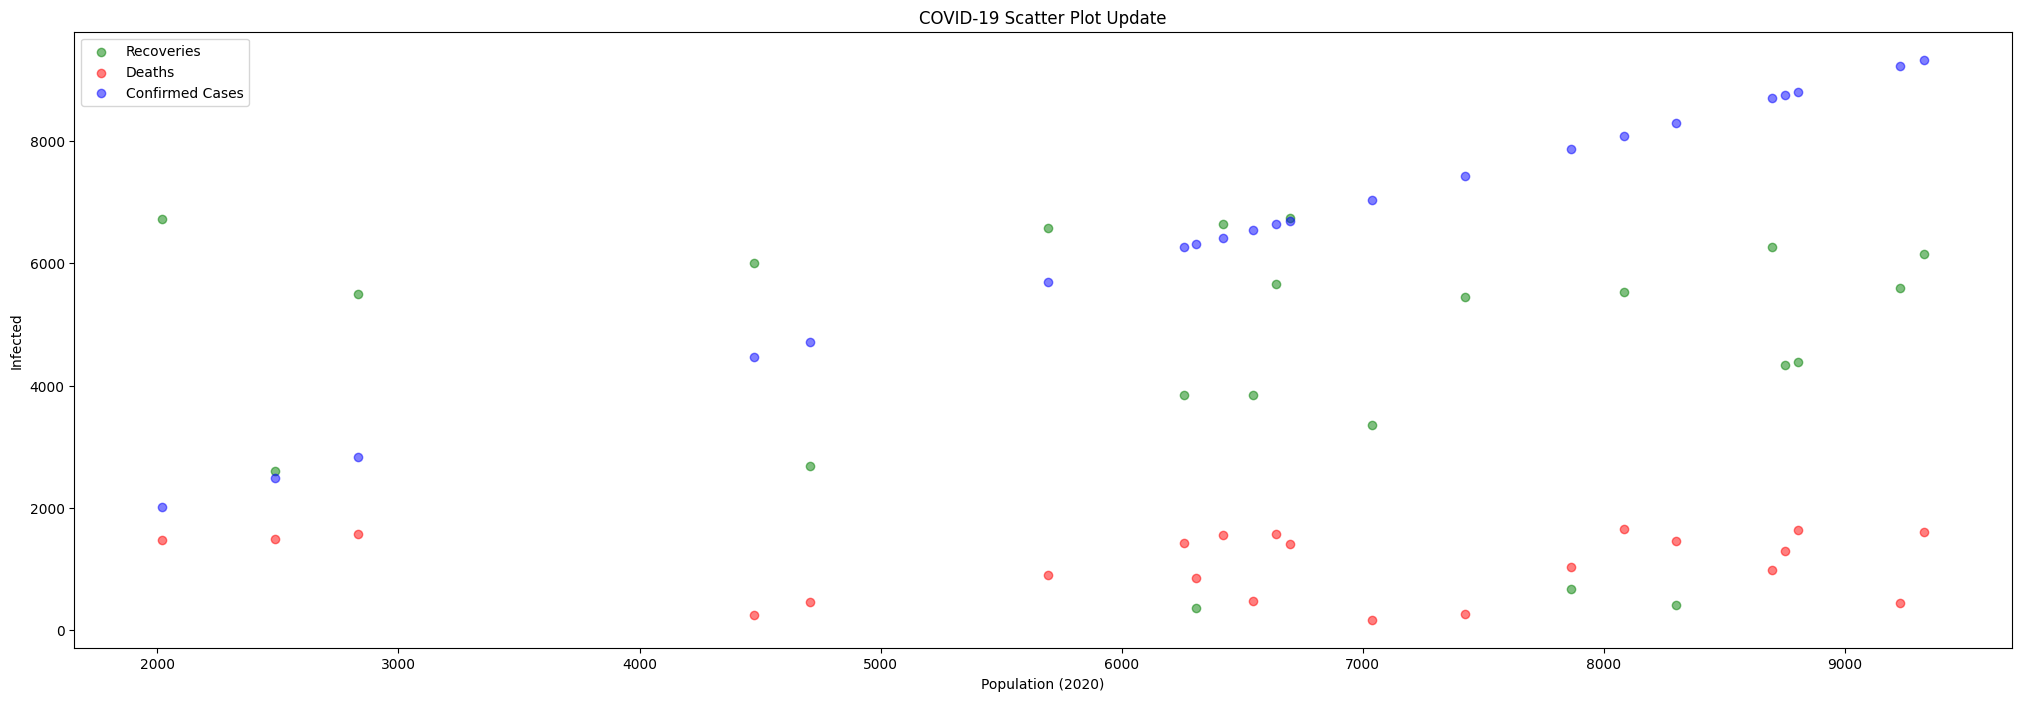

In [ ]:
# Scatter Plot: Dasmarinas COVID-19 Status
plt.figure(figsize=(25, 8))
plt.scatter(covid_df['Confirmed_Cases'], covid_df['Recoveries'],label='Recoveries', color='green', alpha=0.5)
plt.scatter(covid_df['Confirmed_Cases'], covid_df['Deaths'], color='red', label='Deaths', alpha=0.5)
plt.scatter(covid_df['Confirmed_Cases'], covid_df['Confirmed_Cases'], color='blue', label='Confirmed Cases', alpha=0.5)
plt.title('COVID-19 Scatter Plot Update')
plt.xlabel('Population (2020)')
plt.ylabel('Infected')
plt.legend()
plt.show()


### Covid cases sample

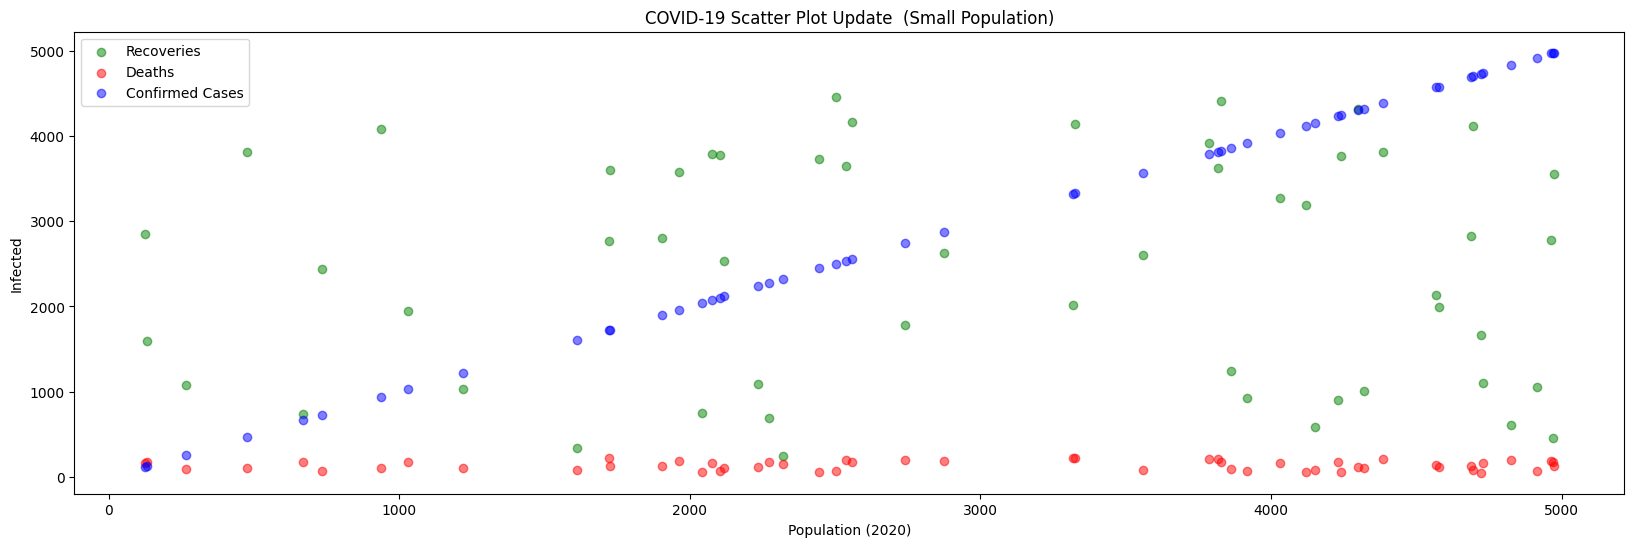

In [ ]:
# Scatter Plot: Dasmarinas COVID-19 Status
plt.figure(figsize=(20, 6))
plt.scatter(covid1_df['Confirmed_Cases'], covid1_df['Recoveries'],label='Recoveries', color='green', alpha=0.5)
plt.scatter(covid1_df['Confirmed_Cases'], covid1_df['Deaths'], color='red', label='Deaths', alpha=0.5)
plt.scatter(covid1_df['Confirmed_Cases'], covid1_df['Confirmed_Cases'], color='blue', label='Confirmed Cases', alpha=0.5)
plt.title('COVID-19 Scatter Plot Update  (Small Population)')
plt.xlabel('Population (2020)')
plt.ylabel('Infected')
plt.legend()
plt.show()

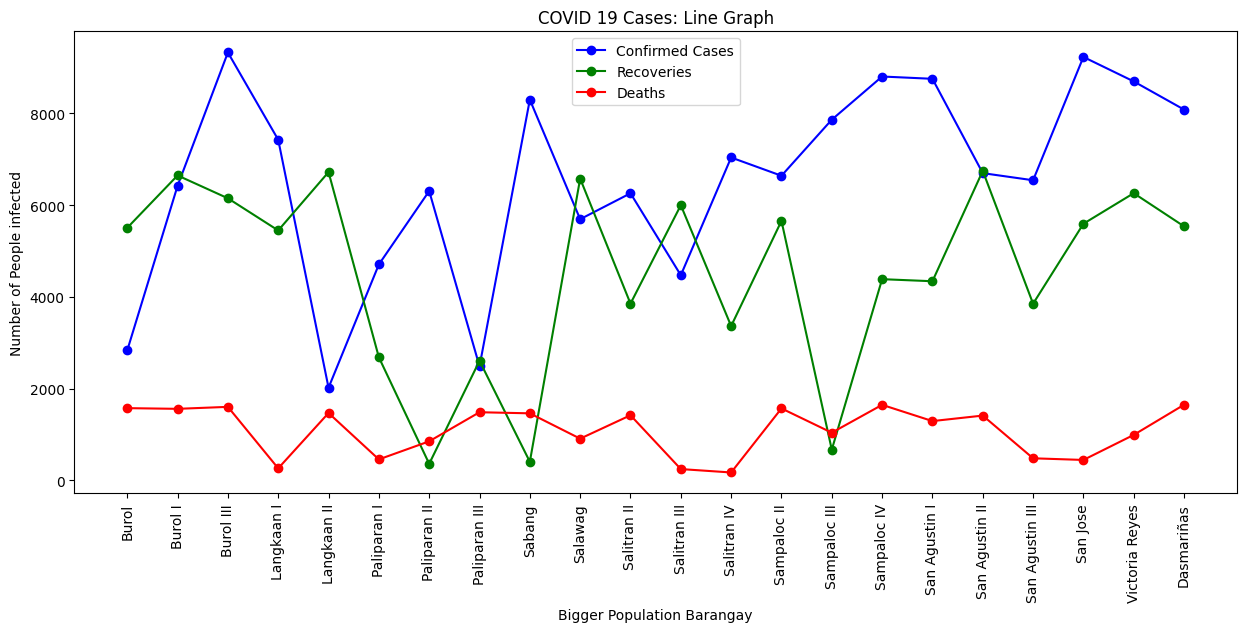

In [ ]:
# Line Graph: Trend of Confirmed Cases
plt.figure(figsize=(15, 6))
plt.plot(covid_df['Barangay'], covid_df['Confirmed_Cases'], marker='o' , color='blue' , label='Confirmed Cases')
plt.plot(covid_df['Barangay'], covid_df['Recoveries'], marker='o' , color='green' , label='Recoveries')
plt.plot(covid_df['Barangay'], covid_df['Deaths'], marker='o' , color='red' , label='Deaths')
plt.title('COVID 19 Cases: Line Graph')
plt.xlabel('Bigger Population Barangay')
plt.xticks(rotation=90)
plt.ylabel('Number of People infected')
plt.legend()
plt.show()



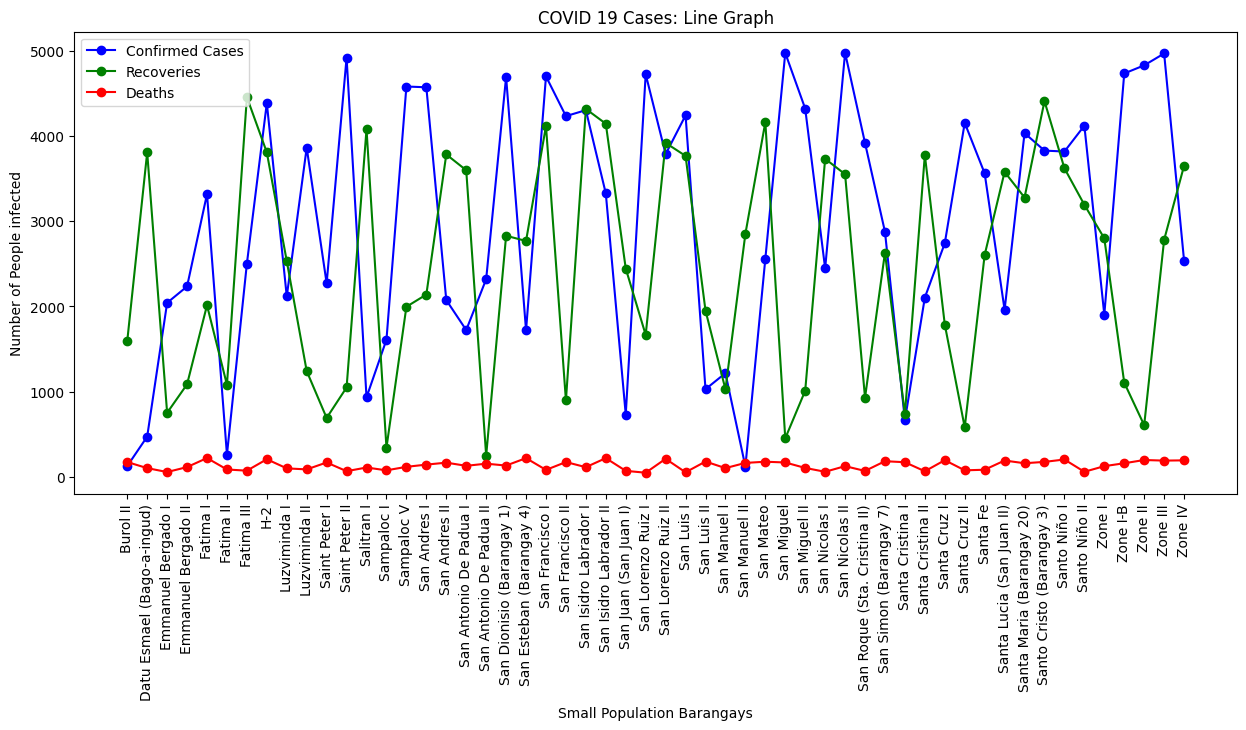

In [ ]:
# Line Graph: Trend of Confirmed Cases
plt.figure(figsize=(15, 6))
plt.plot(covid1_df['Barangay'], covid1_df['Confirmed_Cases'], marker='o' , color='blue' , label='Confirmed Cases')
plt.plot(covid1_df['Barangay'], covid1_df['Recoveries'], marker='o' , color='green' , label='Recoveries')
plt.plot(covid1_df['Barangay'], covid1_df['Deaths'], marker='o' , color='red' , label='Deaths')
plt.title('COVID 19 Cases: Line Graph')
plt.xlabel('Small Population Barangays')
plt.xticks(rotation=90)
plt.ylabel('Number of People infected')
plt.legend()
plt.show()

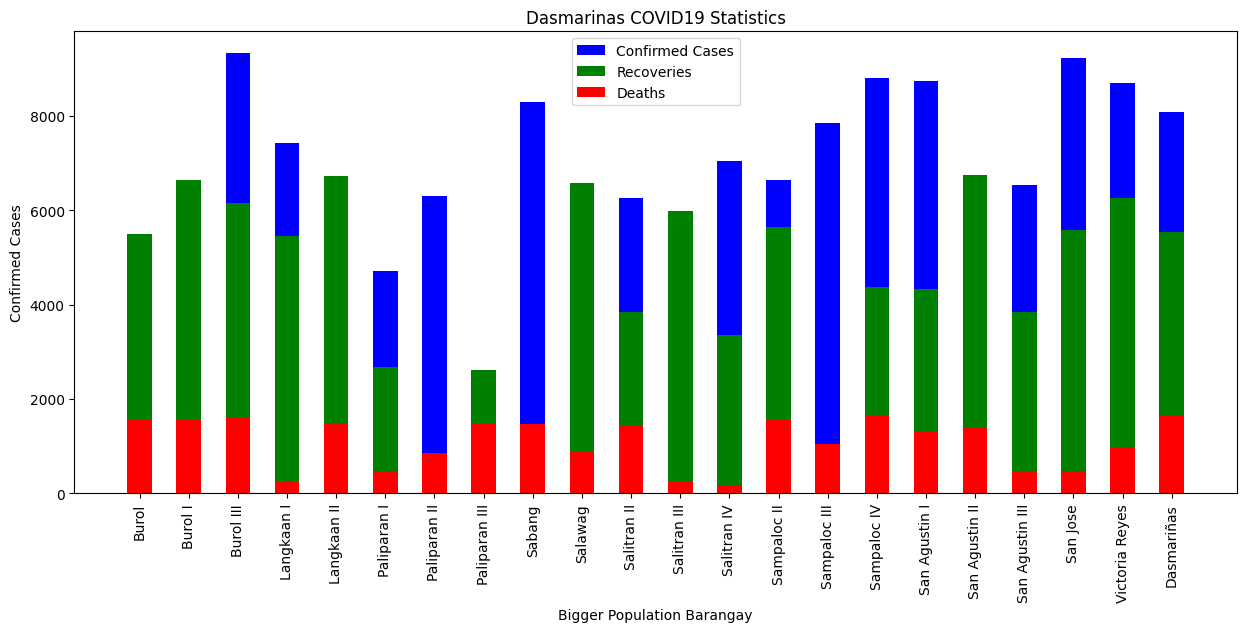

In [ ]:
# Bar Graph: Confirmed Cases in Each Barangay
width=0.50
plt.figure(figsize=(15, 6))
plt.bar(covid_df['Barangay'], covid_df['Confirmed_Cases'], width=width, color='Blue', label='Confirmed Cases')
plt.bar(covid_df['Barangay'], covid_df['Recoveries'], width=width, color='Green', label='Recoveries')
plt.bar(covid_df['Barangay'], covid_df['Deaths'], width=width, color='Red', label='Deaths')
plt.title('Dasmarinas COVID19 Statistics')
plt.xlabel('Bigger Population Barangay')
plt.xticks(rotation=90)
plt.ylabel('Confirmed Cases')
plt.legend()
plt.show()

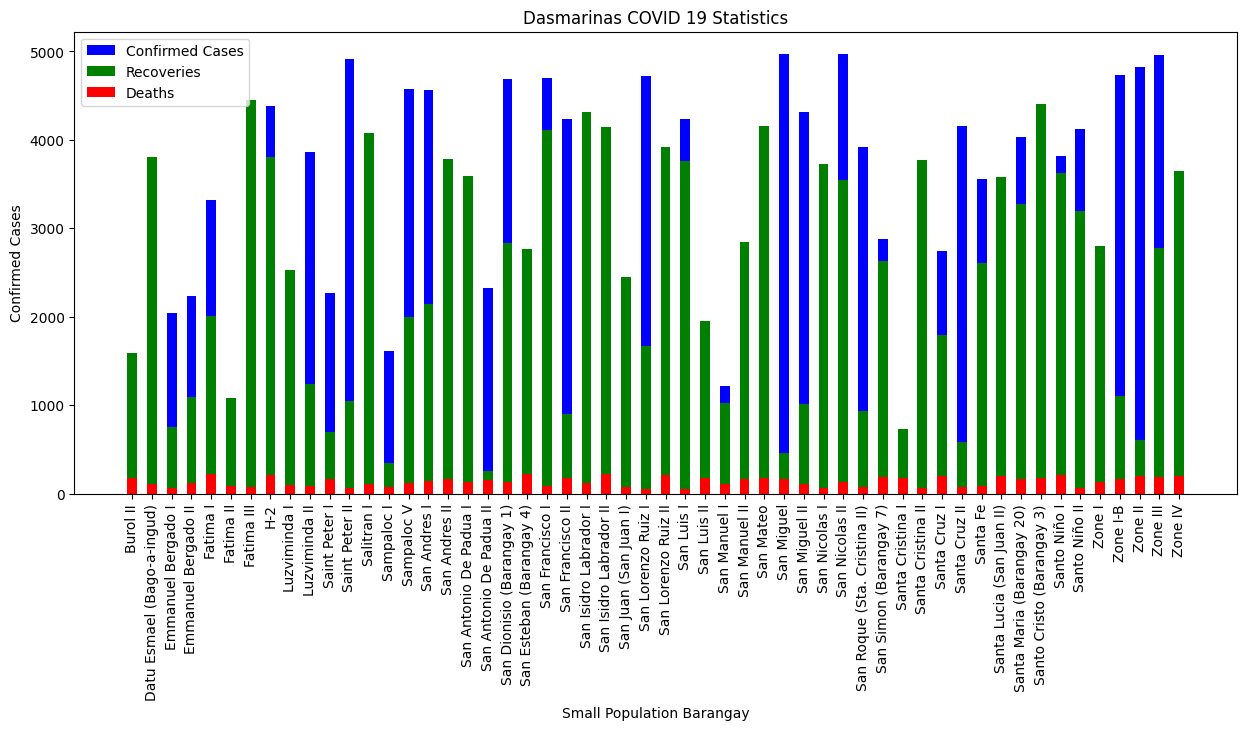

In [ ]:
# Bar Graph: Confirmed Cases in Each Barangay
width=0.50
plt.figure(figsize=(15, 6))
plt.bar(covid1_df['Barangay'], covid1_df['Confirmed_Cases'], width=width, color='Blue', label='Confirmed Cases')
plt.bar(covid1_df['Barangay'], covid1_df['Recoveries'], width=width, color='Green', label='Recoveries')
plt.bar(covid1_df['Barangay'], covid1_df['Deaths'], width=width, color='Red', label='Deaths')
plt.title('Dasmarinas COVID 19 Statistics')
plt.xlabel('Small Population Barangay')
plt.xticks(rotation=90)
plt.ylabel('Confirmed Cases')
plt.legend()
plt.show()

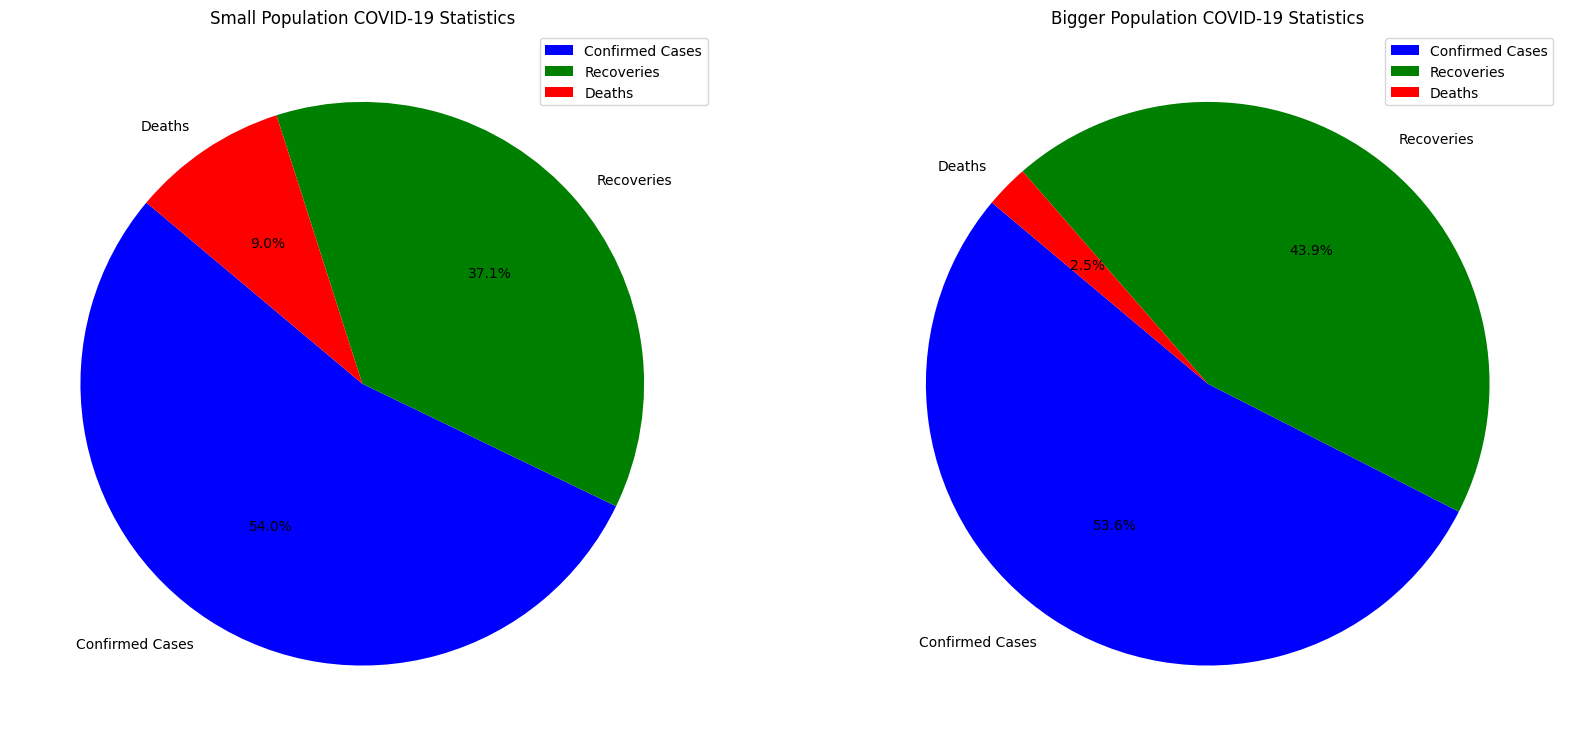

In [ ]:

# Data for first pie chart
Confirmed_Cases1 = covid_df['Confirmed_Cases'].sum()
Recoveries1 = covid_df['Recoveries'].sum()
Deaths1 = covid_df['Deaths'].sum()

sizes1 = [Confirmed_Cases1, Recoveries1, Deaths1]
labels = ['Confirmed Cases', 'Recoveries', 'Deaths']
colors = ['blue', 'green', 'red']

# Data for second pie chart
Confirmed_Cases2 = covid1_df['Confirmed_Cases'].sum()
Recoveries2 = covid1_df['Recoveries'].sum()
Deaths2 = covid1_df['Deaths'].sum()

sizes2 = [Confirmed_Cases2, Recoveries2, Deaths2]

# Create a figure with two subplots (side by side)
plt.figure(figsize=(20, 12))

# First pie chart
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
plt.pie(sizes1, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Small Population COVID-19 Statistics')
plt.legend()

# Second pie chart
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot
plt.pie(sizes2, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Bigger Population COVID-19 Statistics')
plt.legend()

# Display the plots
plt.show()


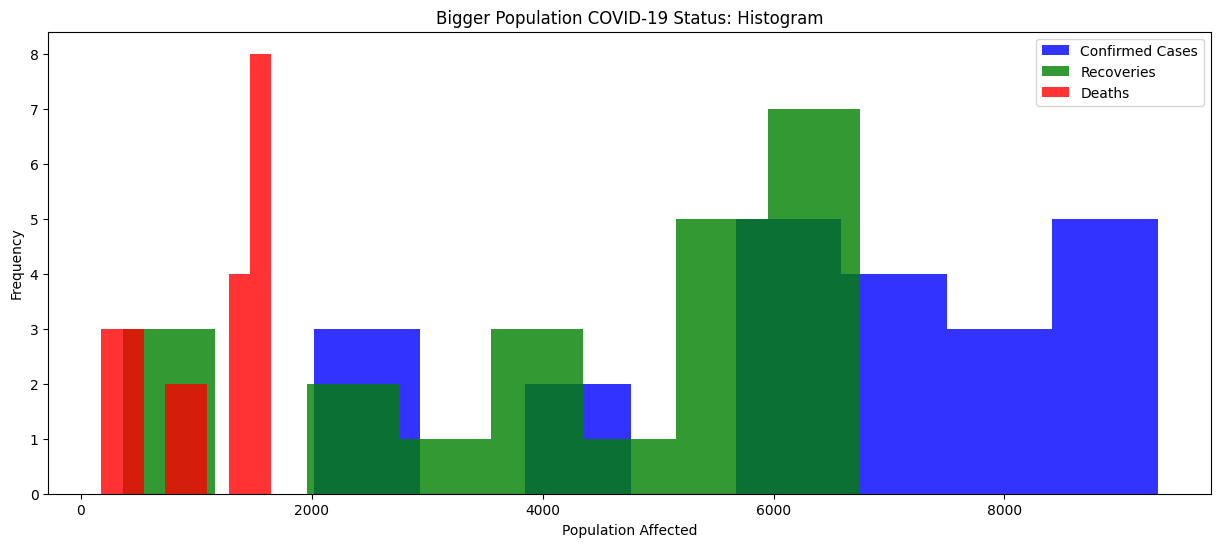

In [ ]:
plt.figure(figsize=(15, 6))
plt.hist(covid_df['Confirmed_Cases'], bins=8, alpha=0.8, color='blue', label='Confirmed Cases')
plt.hist(covid_df['Recoveries'], bins=8, alpha=0.8, color='green', label='Recoveries')
plt.hist(covid_df['Deaths'], bins=8, alpha=0.8, color='red', label='Deaths')
plt.title('Bigger Population COVID-19 Status: Histogram')
plt.xlabel('Population Affected')
plt.ylabel('Frequency')
plt.legend()
plt.show()